<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OVERVIEW" data-toc-modified-id="OVERVIEW-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OVERVIEW</a></span></li><li><span><a href="#OVERVIEW" data-toc-modified-id="OVERVIEW-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OVERVIEW</a></span><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation-and-Preprocessing" data-toc-modified-id="Data-Preparation-and-Preprocessing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Preparation and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Null-Values-and-Duplicates" data-toc-modified-id="Null-Values-and-Duplicates-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Null Values and Duplicates</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Relevancy" data-toc-modified-id="Relevancy-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Relevancy</a></span></li><li><span><a href="#Continuous" data-toc-modified-id="Continuous-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Continuous</a></span></li><li><span><a href="#Categoricals" data-toc-modified-id="Categoricals-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>Categoricals</a></span></li><li><span><a href="#Finalizing-Data-Frame" data-toc-modified-id="Finalizing-Data-Frame-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>Finalizing Data Frame</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li></ul></div>

# OVERVIEW

## Business Understanding
I have been hired by a real estate development company in Kings County, Washington, to model real estate prices based on the Kings County Housing dataset. My intention is to build a model that will accurately predict housing prices based on the features contained in this data set. This model should ideally be able to assist the real estate company in making informed decisions about what type and where to build new houses.

## Data Understanding
The dataset contains records of all recorded house sales in Kings County, WA from May 2014 to May 2015. We have a robust set of 21597 entries to work with. There are 21 columns in this dataset:

* 'price' is the sale price of the house and will be our model's target feature.


* The majority of the columns are already formatted in a way that is easy to work with, however, categorical values will need to be encoded for purposes of this regression model.


* The continuous values may need to be normalized and scaled. I will make this determination during the exploratory stage of this process.

## Data Preparation and Preprocessing

I will start here by looking at null values, data types, duplicates, outliers, and relevancy. Then decide which data is continuous or categorical, and make the appropriate transformations. Finally I will examine the relationship between variables and check for multicollinearity.  

### EDA

In [1]:
# importing relevent libraries for scrubbing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools as it
%matplotlib inline
sns.set_context('talk')

from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, normalize, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.regression import linear_model
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# suppressing scientific notation
# adapted from https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('data/kc_house_data.csv')

In [2]:
def prelim(df):
    """displays core information
    on a dataframe at the beginning of EDA
    
    accepts a DataFrame as input, and displays
    the head, info, and sum of all null values
    for each column in that DataFrame
    """
    return (display(df.head()), 
            display(df.info()), 
            display(df.isna().sum()))

prelim(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

(None, None, None)

### Null Values and Duplicates

In [3]:
print('Waterfront value counts:')
print(df['waterfront'].value_counts())
print('--------------')
print('View value counts:')
print(df['view'].value_counts())
print('--------------')
print('yr_renovated value counts:')
print(df['yr_renovated'].value_counts())
print('--------------')

Waterfront value counts:
0.00    19075
1.00      146
Name: waterfront, dtype: int64
--------------
View value counts:
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64
--------------
yr_renovated value counts:
0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64
--------------


**'waterfront'** is a binary, categorical variable that is missing 2376 entries. A value of 1 for 'waterfront' means the house has a waterfront view, whereas a value of 0 means the house has no waterfront view. With more time I would try and impute a value to each null entry based on location, either using the **'zipcode'** column or plotting the houses using the **'lat'** and **'long'** variables. However, for the sake of simplicity and clarity, I will assign the null entries a 1 or 0 based on the proportion of waterfront views in the data set.

In [4]:
# calculating expected number of additional waterfront view houses
waterfront_ratio = 146/19075
waterfront_ratio

# imputing null values according to ratio of expected waterfront view houses
df['waterfront'] = df['waterfront'].fillna(
    pd.Series(np.random.choice([0, 1], p=[1-0.008, .008], size=len(df))))

**'view'**, also a categorical, missing 63 entries, is a count of the number of times that a house has been viewed.  The vast majority of the entries for this feature are 0, which I will use to impute as a value to the NaNs.

In [5]:
# imputing NaNs with value of 0
df['view'] = df['view'].fillna(0)

**'yr_renovated'** is a (semi-)continuous variable. The overwhelming majority of entries for this variable are 0.00, suggesting that most houses have never been renovated, thereby obviating any usefulness this column may have as a predictor. An alternative option would be to turn this variable into a binary, with a value of 0 for never renovated, and a value of 1 for 'has been renovated' independent of time.

In [6]:
# creating binary from categorical
def is_renovated(value):
    if value == 0:
        return 0
    else:
        return 1

df['is_renovated'] = df['yr_renovated'].apply(is_renovated)
df = df.drop('yr_renovated', axis=1)

In [7]:
# sanity check that NaNs have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [8]:
# investigating duplicate entries
dupes = df.loc[df['id'].duplicated(keep=False)]
dupes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
93,6021501535,7/25/2014,430000.00,3,1.50,1580,5000,1.00,0.00,0.00,...,8,1290,290.0,1939,98117,47.69,-122.39,1570,4500,0
94,6021501535,12/23/2014,700000.00,3,1.50,1580,5000,1.00,0.00,0.00,...,8,1290,290.0,1939,98117,47.69,-122.39,1570,4500,0
313,4139480200,6/18/2014,1380000.00,4,3.25,4290,12103,1.00,0.00,3.00,...,11,2690,1600.0,1997,98006,47.55,-122.10,3860,11244,0
314,4139480200,12/9/2014,1400000.00,4,3.25,4290,12103,1.00,0.00,3.00,...,11,2690,1600.0,1997,98006,47.55,-122.10,3860,11244,0
324,7520000520,9/5/2014,232000.00,2,1.00,1240,12092,1.00,0.00,0.00,...,6,960,280.0,1922,98146,47.50,-122.35,1820,7460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.00,4,2.50,2680,5539,2.00,0.00,0.00,...,8,2680,0.0,2013,98045,47.48,-121.73,2680,5992,0
20763,6300000226,6/26/2014,240000.00,4,1.00,1200,2171,1.50,0.00,0.00,...,7,1200,0.0,1933,98133,47.71,-122.34,1130,1598,0
20764,6300000226,5/4/2015,380000.00,4,1.00,1200,2171,1.50,0.00,0.00,...,7,1200,0.0,1933,98133,47.71,-122.34,1130,1598,0
21564,7853420110,10/3/2014,594866.00,3,3.00,2780,6000,2.00,0.00,0.00,...,9,2780,0.0,2013,98065,47.52,-121.89,2850,6000,0


There are a number of duplicate entries in the **'id'** column, which would suggest some cleaning is in order, but after looking at the corresponding price for each entry, it is clear that there were some houses that were sold multiple times in the year that the data was collected.

A side quest analyzing what predictors the houses that were flipped multiple times share could be interesting, but is beyond the scope of business problem. The absence of data in the **'yr_renovated'** column would frustrate this analysis, as I would want to know what sort of improvements were made to the properties between the sales.

### Data Types
The majority of the columns are of the expected data type. We could recast **'date'** as a pandas date-time type, but it is not immediately clear that doing so would benefit our analysis. Alternatively I can use **'date'** and **'yr_built'** to engineer an **'age'** feature.

In [9]:
df['date'] = [x.strip()[-4:] for x in df['date']]
df['date'] = df['date'].astype(int)

df['age'] = df['date'] - df['yr_built']
df = df.drop(['date', 'yr_built'], axis=1)
df['age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: age, Length: 21597, dtype: int64

**'sqft_basement'** is another object data type that should be recast as an int, however, it appears that the variable **'sqft_living'** is the sum of **'sqft_basement'** and **'sqft_above'**. If this is the case, we will most likely want to eliminate both those columns to reduce the impact of multicollinearity.

The rest of the columns are in a data type suitable to perform a regression model.

In [11]:
# recast 'sqft_basement' as int
df['sqft_basement'] = df['sqft_basement'].replace('?', 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float).astype(int)
df['sqft_basement'].head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int64

### Outliers

In [12]:
df['price'].describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

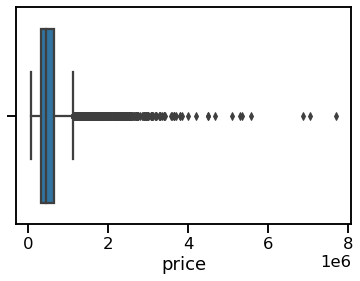

In [13]:
sns.boxplot(x=df['price'])

In [14]:
# identifying outliers based on z-score and removing.
df['z_score'] = np.abs(stats.zscore(df['price']))
df = (df.loc[df['z_score'] < 3])
df = df.drop('z_score', axis=1)

In [15]:
df['price'].describe()

count     21191.00
mean     507010.29
std      259462.21
min       78000.00
25%      320000.00
50%      447000.00
75%      627650.00
max     1640000.00
Name: price, dtype: float64

In the course of examining categorical and continuous values we will identify other outliers and decide if we should remove them from our data set.

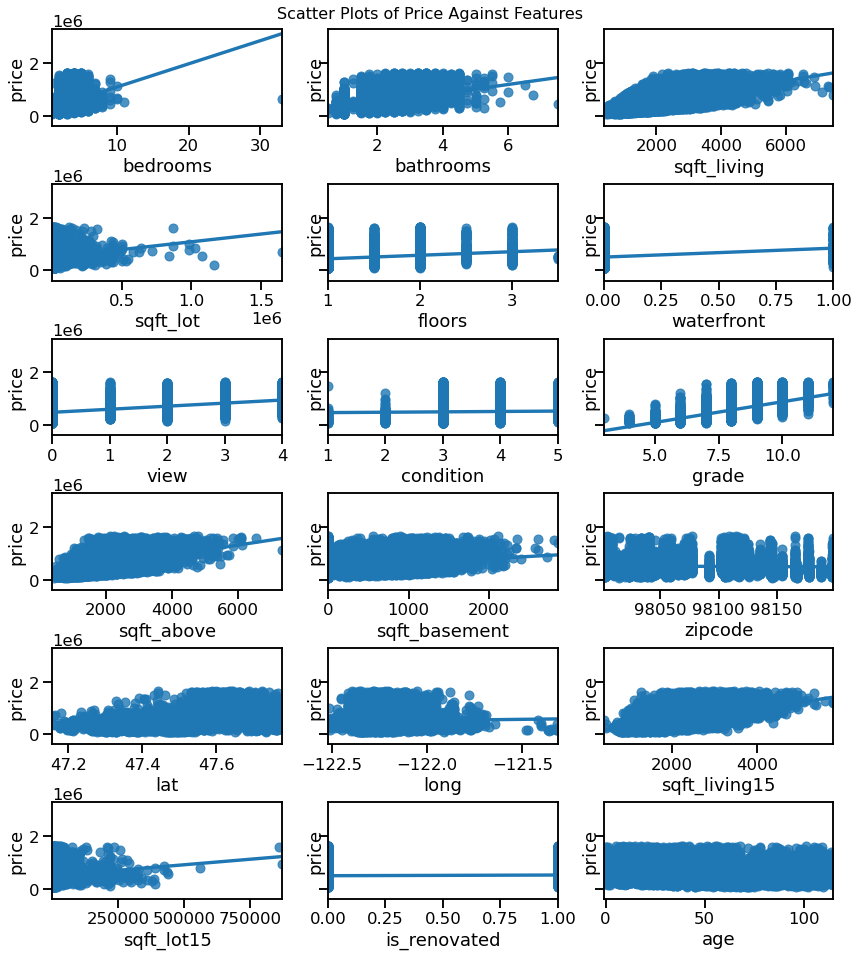

In [16]:
fig,ax = plt.subplots(figsize=(14,16), ncols=3, nrows=6, sharey=True)
fig.suptitle('Scatter Plots of Price Against Features', fontsize=16, y=.9)
cols = list(df.drop(['price','id'],axis=1).columns)
plt.subplots_adjust(hspace = 0.6)
for i, col in enumerate(cols):
    sns.regplot(x=col, y='price', ci=None, data=df, ax=ax[i//3][i%3])

### Relevancy

Deciding which columns are relevant to a regression model is subjective. Clearly, a column like **'id'**, which is a unique identifier of a particular house will not have any sort of linear relationship to house price, and can be eliminated.

Creating a heat map of the variables will help us decide which features can be discarded, and give us an inking of which features may interfere with our modeling due to multicollinearity. I will also run a **variance inflation factor** to test for multicollinearity.


#### Heatmap

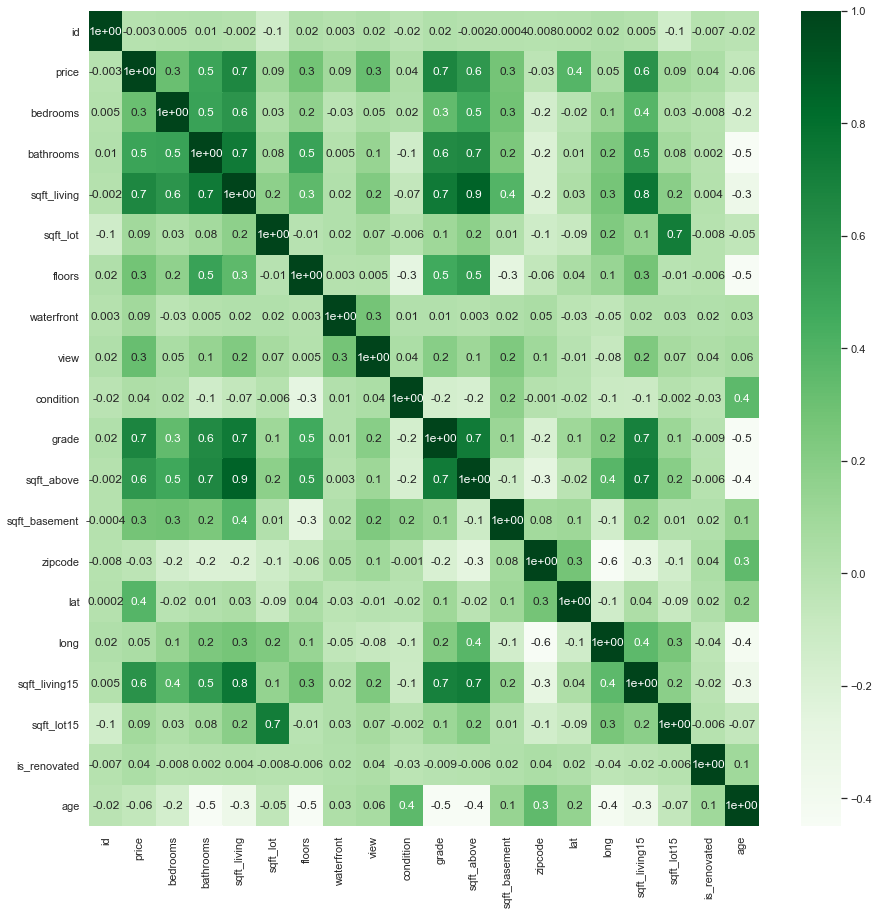

In [17]:
# plot a heatmap using seaborn
sns. set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data=df.corr(), annot=True, robust=True, fmt='.1', cmap="Greens")
plt.tight_layout;

Right off the bat, we can see that **'price'** most strongly correlates, intuitively and perhaps unsurprisingly with **'sqft_living'**, and **'grade'**. 

Other significant correlations include:

**'bathrooms'** and **'sqft_living'**

**'sqft_living'** and **'sqft_above'**

**'sqft_living'** and **'grade'**

**'grade'** and **'sqft_above'**

The relationships between **'sqft_above'**, **'sqft_living'**, and **'sqft_basement'** suggest some strong collinearity and require further investigation. The relationship between **'sqft_living15'** and **'sqft_lot15'** also will be looked at closely.


#### VIF

In [18]:
vif_dct = {}

for i in range(len(df.columns)):
    vif = variance_inflation_factor(df.values, i).round(3)
    v = df.columns[i]
    vif_dct[v] = vif
    
vif_dct

{'id': 3.645,
 'price': 3.469,
 'bedrooms': 1.669,
 'bathrooms': 3.154,
 'sqft_living': 127.516,
 'sqft_lot': 2.106,
 'floors': 2.015,
 'waterfront': 1.093,
 'view': 1.301,
 'condition': 1.207,
 'grade': 3.616,
 'sqft_above': 108.149,
 'sqft_basement': 31.857,
 'zipcode': 0.489,
 'lat': 1.504,
 'long': 1.842,
 'sqft_living15': 2.903,
 'sqft_lot15': 2.146,
 'is_renovated': 1.021,
 'age': 2.284}

Generally we are looking really good here. With very few VIF values over 10, we can eliminate the multicollinearity and move forward with our processing.

In [20]:
df = df.drop('sqft_basement', axis=1)

vif_dct = {}

for i in range(len(df.columns)):
    vif = variance_inflation_factor(df.values, i).round(3)
    v = df.columns[i]
    vif_dct[v] = vif
    
vif_dct

{'id': 3.645,
 'price': 3.469,
 'bedrooms': 1.669,
 'bathrooms': 3.153,
 'sqft_living': 8.027,
 'sqft_lot': 2.105,
 'floors': 2.015,
 'waterfront': 1.093,
 'view': 1.301,
 'condition': 1.207,
 'grade': 3.616,
 'sqft_above': 6.314,
 'zipcode': 0.489,
 'lat': 1.504,
 'long': 1.842,
 'sqft_living15': 2.902,
 'sqft_lot15': 2.145,
 'is_renovated': 1.021,
 'age': 2.284}

By dropping the **'sqft_basement'** column we have eliminated any multicollinearity flags.

### Continuous

Here I will explore the continuous variables in the data set, and determine if normalization and scaling are necessary


#### sqft_living

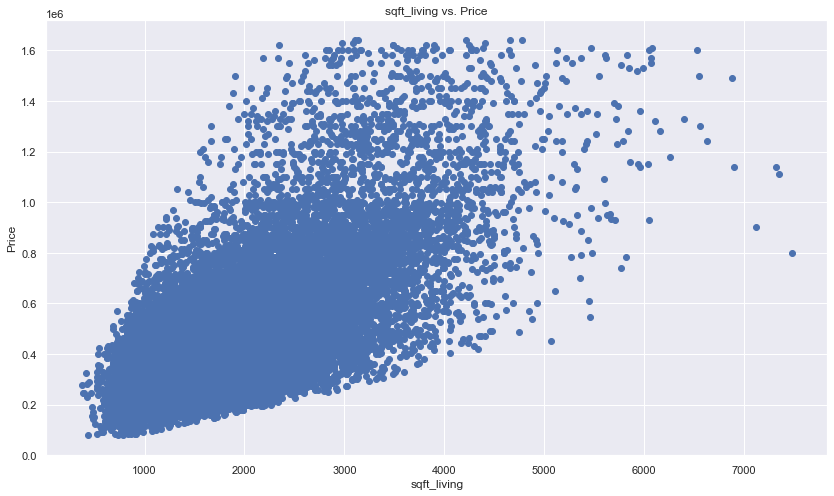

In [22]:
plt.figure(figsize=(14,8))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('sqft_living vs. Price');

In [23]:
df['sqft_living_z'] = np.abs(stats.zscore(df['sqft_living']))
df = (df.loc[df['sqft_living_z'] < 3])
df = df.drop('sqft_living_z', axis=1)

#### sqft_lot

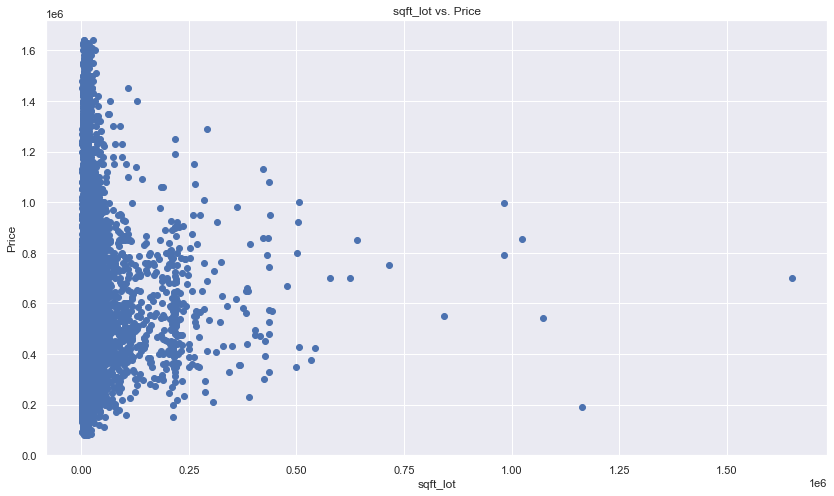

In [24]:
plt.figure(figsize=(14,8))
plt.scatter(df['sqft_lot'], df['price'])
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('sqft_lot vs. Price');

In [25]:
df['sqft_lot_z'] = np.abs(stats.zscore(df['sqft_lot']))
df = (df.loc[df['sqft_lot_z'] < 3])
df = df.drop('sqft_lot_z', axis=1)

#### sqft_above

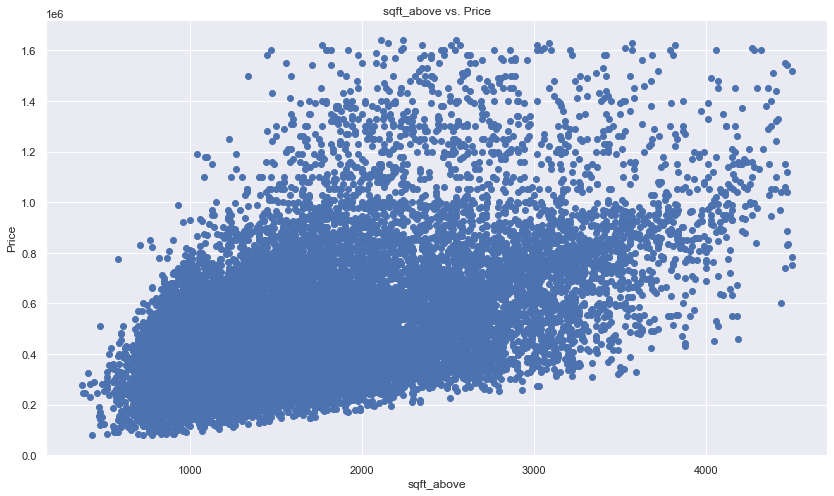

In [27]:
plt.figure(figsize=(14,8))
plt.scatter(df['sqft_above'], df['price'])
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('sqft_above vs. Price');

In [28]:
df['sqft_above_z'] = np.abs(stats.zscore(df['sqft_above']))
df = (df.loc[df['sqft_above_z'] < 3])
df = df.drop('sqft_above_z', axis=1)

#### sqft_living15

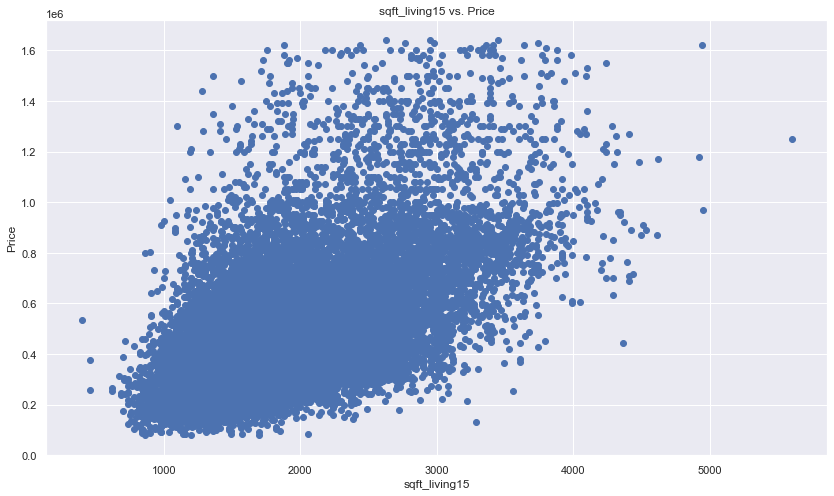

In [30]:
plt.figure(figsize=(14,8))
plt.scatter(df['sqft_living15'], df['price'])
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('sqft_living15 vs. Price');

In [31]:
df['sqft_living15_z'] = np.abs(stats.zscore(df['sqft_living15']))
df = (df.loc[df['sqft_living15_z'] < 3])
df = df.drop('sqft_living15_z', axis=1)

#### sqft_lot15

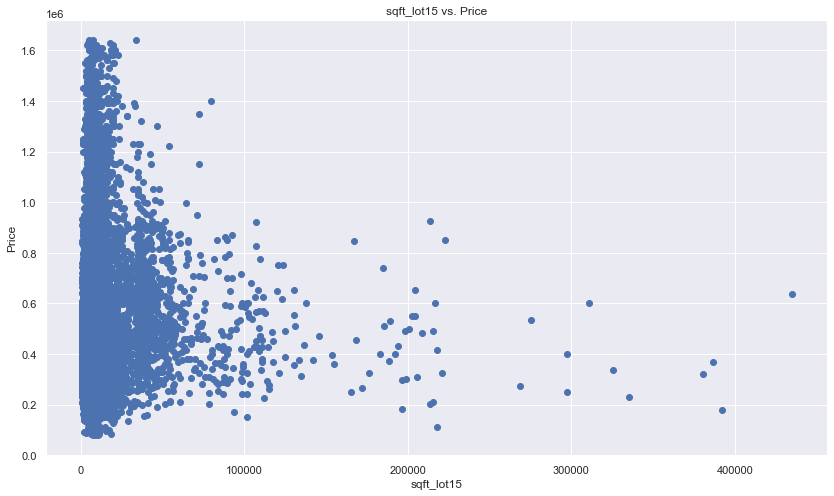

In [32]:
plt.figure(figsize=(14,8))
plt.scatter(df['sqft_lot15'], df['price'])
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.title('sqft_lot15 vs. Price');

In [33]:
df['sqft_lot15_z'] = np.abs(stats.zscore(df['sqft_lot15']))
df = (df.loc[df['sqft_lot15_z'] < 3])
df = df.drop('sqft_lot15_z', axis=1)

### Categoricals

Here I will look at the categorical variables and transform the data via one-hot-encoding, to make it suitable for regression modeling.

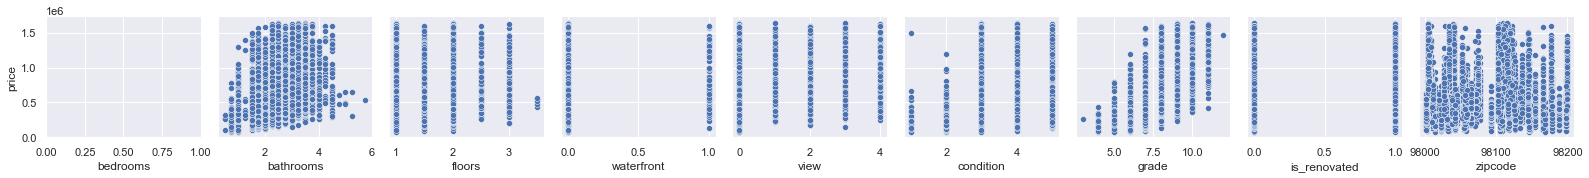

In [35]:
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'is_renovated', 'zipcode']
sns.pairplot(data=df, x_vars=categoricals, y_vars='price')
plt.show()

#### Bedrooms

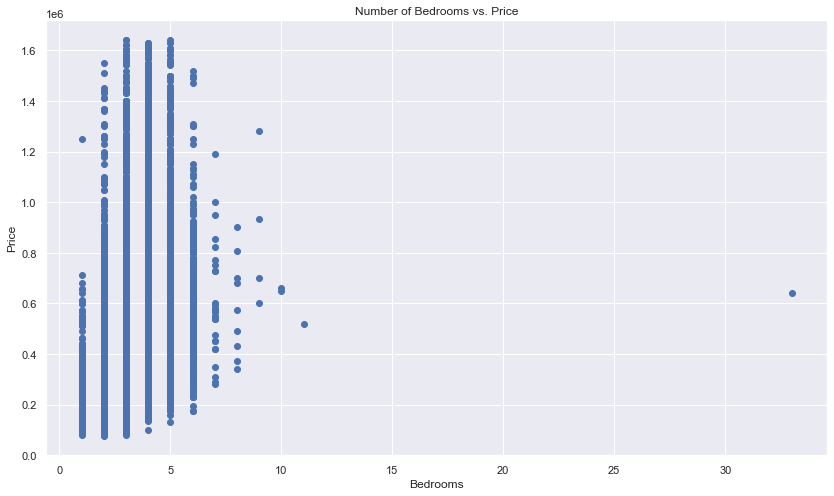

In [36]:
# bedrooms
plt.figure(figsize=(14,8))
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs. Price');

In [37]:
# investigating outlier
df.loc[df['bedrooms'] > 15]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,age
15856,2402100895,640000.00,33,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,98103,47.69,-122.33,1330,4700,0,67


Given the sale price this house, and other variables (only 1.75 bathrooms for 33 bedrooms?) it is very likely that this is an entry error. Let's change this entry to the more likely 3 bedrooms the data reflects.


In [38]:
# replacing entry error
df['bedrooms'].replace({33 : 3}, inplace=True)

In [39]:
# encoding
ohe = OneHotEncoder(drop='first', sparse=False)
bedrooms_ohe = ohe.fit_transform(df[['bedrooms']])
ohe.get_feature_names()
bedrooms_processed = pd.DataFrame(bedrooms_ohe, columns=ohe.get_feature_names(['br']))

#### Bathrooms

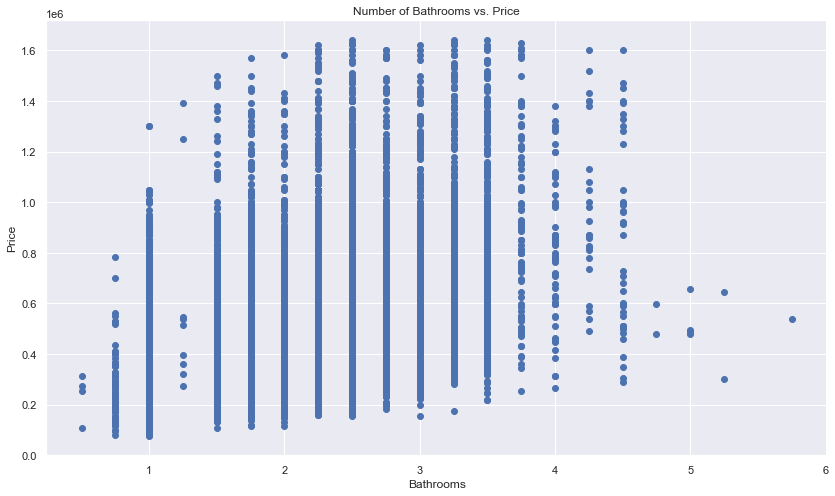

In [40]:
plt.figure(figsize=(14,8))
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs. Price');

It looks like there may be some outliers in **'bathrooms'**. Let's use the z-score methodology to investigate.

In [41]:
df['baths_z_score'] = np.abs(stats.zscore(df['bathrooms']))
df['baths_z_score'].describe()

count   20087.00
mean        0.83
std         0.56
min         0.07
25%         0.43
50%         0.64
75%         1.36
max         5.28
Name: baths_z_score, dtype: float64

In [42]:
df = (df.loc[df['baths_z_score'] < 3])
df = df.drop('baths_z_score', axis=1)

There is an unusually high cardinality for bathrooms. Before encoding we should 'bin' these values to refine the number of variables we are encoding for. These 'bins' should be 0-1, 1-2, 2-3, 3-4, 4-5, and >5.

In [43]:
# binning assitance from 
# https://towardsdatascience.com/feature-engineering-examples-binning-categorical-features-9f8d582455da

def bath_bins(num_bathrooms):
    if num_bathrooms in [0.0, 0.25, 0.50, 0.75]:
        return 0
    elif num_bathrooms in [1.0, 1.25, 1.50]:
        return 1
    elif num_bathrooms in [1.75, 2.0, 2.25, 2.50]:
        return 2
    elif num_bathrooms in [2.75, 3, 3.25, 3.50]:
        return 3
    elif num_bathrooms in [3.75, 4, 4.25, 4.50]:
        return 4
    elif num_bathrooms >= 4.75:
        return 5

df['bathrooms'] = df['bathrooms'].apply(bath_bins)

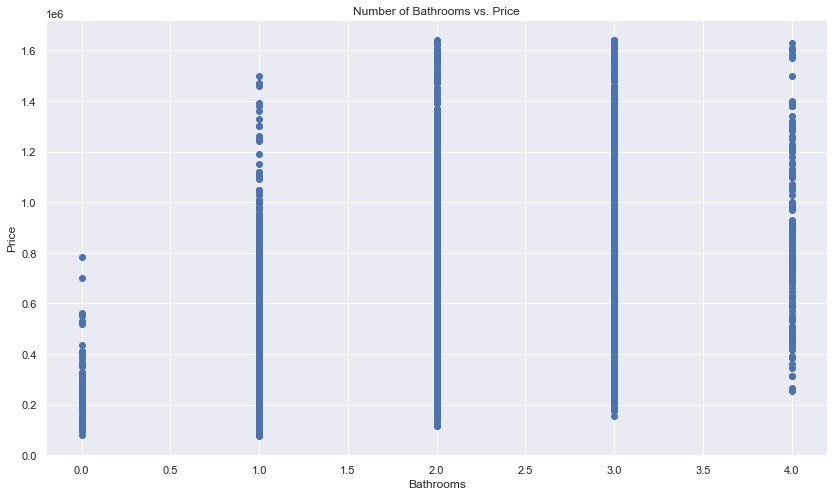

In [44]:
plt.figure(figsize=(14,8))
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs. Price');

In [45]:
ohe = OneHotEncoder(drop='first', sparse=False)
bathrooms_ohe = ohe.fit_transform(df[['bathrooms']])
ohe.get_feature_names()
bathrooms_processed = pd.DataFrame(bathrooms_ohe, columns=ohe.get_feature_names(['baths']))

#### Floors

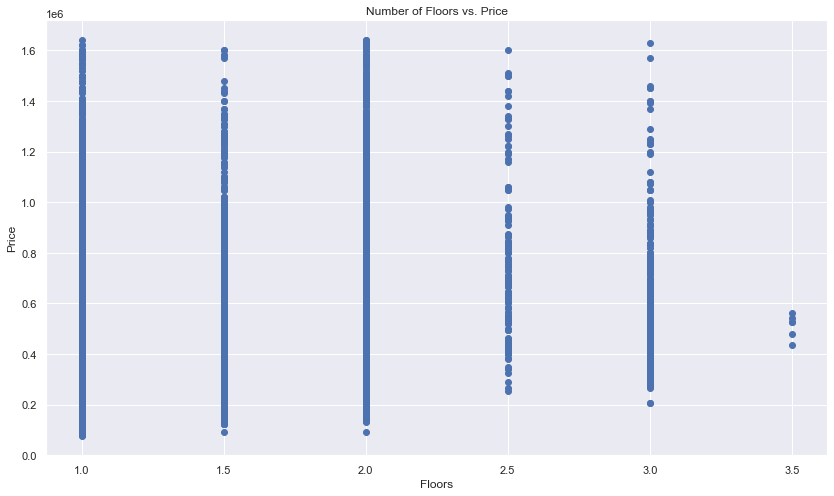

In [46]:
plt.figure(figsize=(14,8))
plt.scatter(df['floors'], df['price'])
plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Number of Floors vs. Price');

In [47]:
ohe = OneHotEncoder(drop='first', sparse=False)
floors_ohe = ohe.fit_transform(df[['floors']])
ohe.get_feature_names()
floors_processed = pd.DataFrame(floors_ohe, columns=ohe.get_feature_names(['floor']))

#### Waterfront

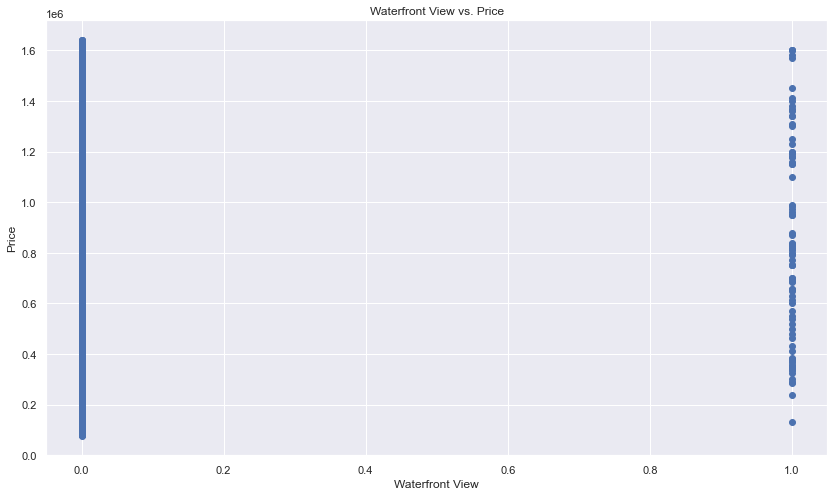

In [48]:
plt.figure(figsize=(14,8))
plt.scatter(df['waterfront'], df['price'])
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Waterfront View vs. Price');

In [49]:
ohe = OneHotEncoder(drop='first', sparse=False)
waterfront_ohe = ohe.fit_transform(df[['waterfront']])
ohe.get_feature_names()
waterfront_processed = pd.DataFrame(waterfront_ohe, columns=ohe.get_feature_names(['water']))

#### View

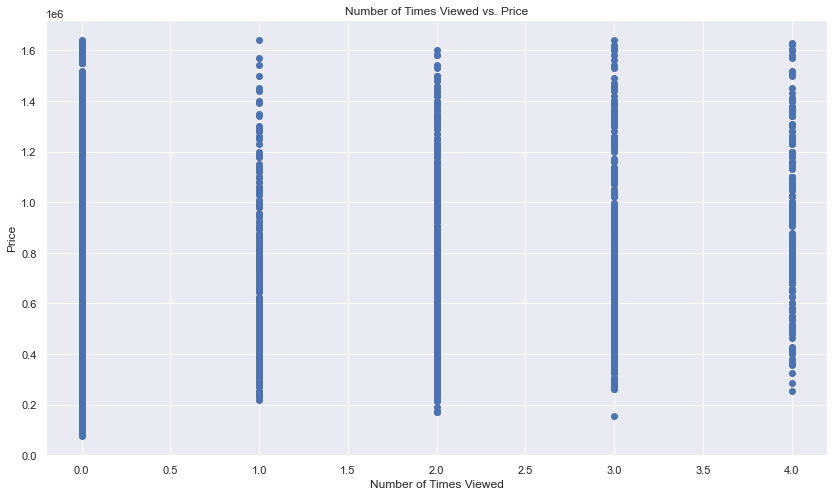

In [50]:
plt.figure(figsize=(14,8))
plt.scatter(df['view'], df['price'])
plt.xlabel('Number of Times Viewed')
plt.ylabel('Price')
plt.title('Number of Times Viewed vs. Price');

In [51]:
ohe = OneHotEncoder(drop='first', sparse=False)
view_ohe = ohe.fit_transform(df[['view']])
ohe.get_feature_names()
view_processed = pd.DataFrame(view_ohe, columns=ohe.get_feature_names(['view']))

#### Condition

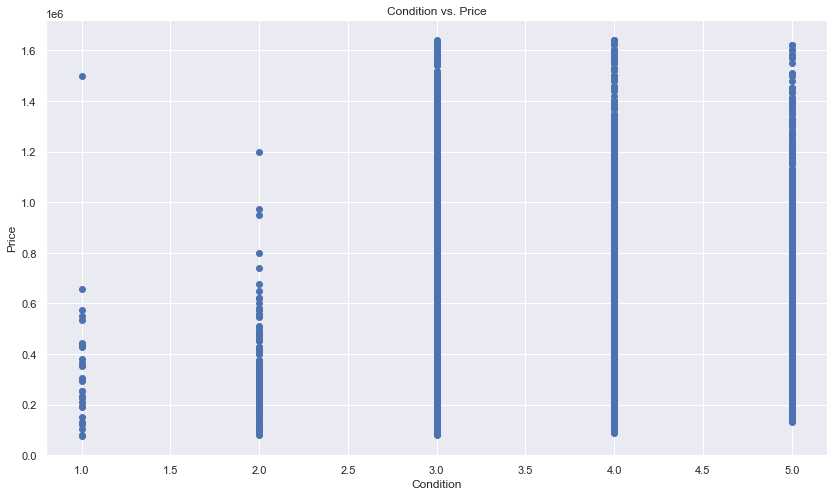

In [52]:
plt.figure(figsize=(14,8))
plt.scatter(df['condition'], df['price'])
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition vs. Price');

In [53]:
ohe = OneHotEncoder(drop='first', sparse=False)
condition_ohe = ohe.fit_transform(df[['condition']])
ohe.get_feature_names()
condition_processed = pd.DataFrame(condition_ohe, columns=ohe.get_feature_names(['cond']))

#### Grade

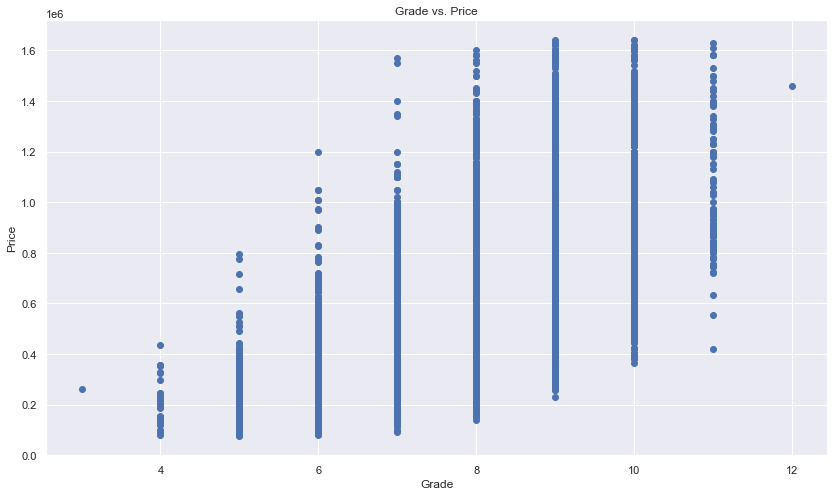

In [54]:
plt.figure(figsize=(14,8))
plt.scatter(df['grade'], df['price'])
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs. Price');

In [55]:
ohe = OneHotEncoder(drop='first', sparse=False)
grade_ohe = ohe.fit_transform(df[['grade']])
ohe.get_feature_names()
grade_processed = pd.DataFrame(grade_ohe, columns=ohe.get_feature_names(['grade']))

#### is_renovated

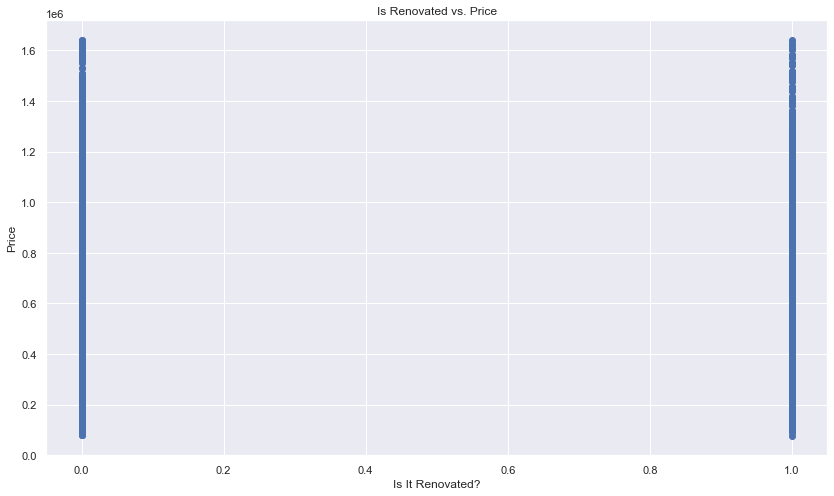

In [56]:
plt.figure(figsize=(14,8))
plt.scatter(df['is_renovated'], df['price'])
plt.xlabel('Is It Renovated?')
plt.ylabel('Price')
plt.title('Is Renovated vs. Price');

In [57]:
ohe = OneHotEncoder(drop='first', sparse=False)
renovated_ohe = ohe.fit_transform(df[['is_renovated']])
ohe.get_feature_names()
renovated_processed = pd.DataFrame(renovated_ohe, columns=ohe.get_feature_names(['renovated']))

#### Zipcode

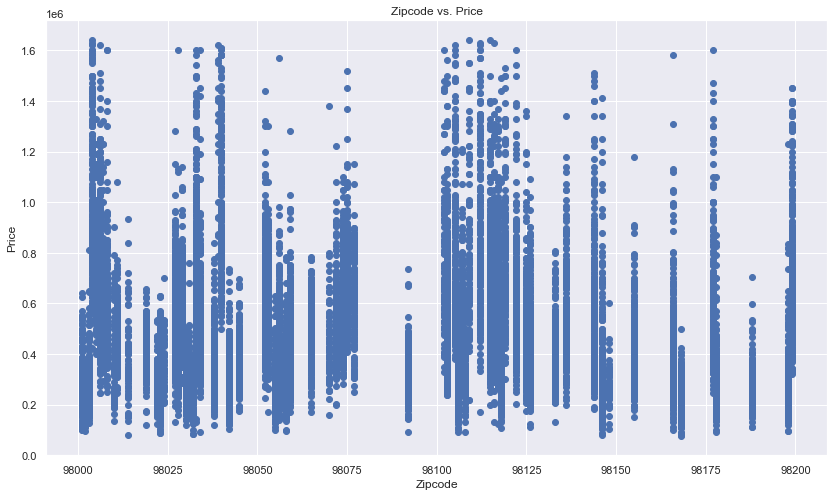

In [58]:
plt.figure(figsize=(14,8))
plt.scatter(df['zipcode'], df['price'])
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Zipcode vs. Price');

In [59]:
ohe = OneHotEncoder(drop='first', sparse=False)
zipcode_ohe = ohe.fit_transform(df[['zipcode']])
ohe.get_feature_names()
zipcode_processed = pd.DataFrame(zipcode_ohe, columns=ohe.get_feature_names(['zips']))

### Finalizing Data Frame

We have preprocessed all the data. All categorical values have been encoded to be suitable for use in regression modeling.

We began with 20 independent variables, and 1 dependent variable (**'price'**). Due to outright irrelevancy we have dropped:

**'id'**, **'lat'**, **'long'**

We solved for multicollinearity by dropping **'sqft_basement'**.

We have engineered a new feature, **'age'** obviating the need to retain **'date'** and **'yr_built'**.

We have changed **'yr_renovated'** into a binary, **'renovated'**

Finally, we will scale our variables to increase interpretability.

In [60]:
# breaking out y (target) before scaling
y = df['price']

# dropping columns not used in regression model
df = df.drop(['price', 'id', 'lat', 'long'], axis=1)

# scaling the continuous data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,is_renovated,age
0,-0.37,-1.35,-1.06,-0.38,-0.88,-0.06,-0.28,-0.64,-0.52,-0.74,1.82,-0.96,-0.42,-0.52,0.50
1,-0.37,0.18,0.84,-0.23,0.97,-0.06,-0.28,-0.64,-0.52,0.73,0.84,-0.37,-0.15,1.93,0.64
2,-1.51,-1.35,-1.61,0.04,-0.88,-0.06,-0.28,-0.64,-1.50,-1.34,-0.96,1.39,-0.09,1.93,1.28
3,0.77,1.71,0.01,-0.45,-0.88,-0.06,-0.28,2.43,-0.52,-0.93,1.04,-0.93,-0.51,-0.52,0.16
4,-0.37,0.18,-0.37,-0.15,-0.88,-0.06,-0.28,-0.64,0.46,0.00,-0.11,-0.18,-0.17,-0.52,-0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20010,-0.37,0.18,-0.58,-0.82,2.83,-0.06,-0.28,-0.64,0.46,-0.22,0.43,-0.64,-0.98,-0.52,-1.34
20011,0.77,0.18,0.49,-0.37,0.97,-0.06,-0.28,-0.64,0.46,0.93,1.23,-0.13,-0.21,-0.52,-1.47
20012,-1.51,-2.88,-1.27,-0.80,0.97,-0.06,-0.28,-0.64,-0.52,-0.97,1.19,-1.51,-0.92,-0.52,-1.34
20013,-0.37,0.18,-0.48,-0.70,0.97,-0.06,-0.28,-0.64,0.46,-0.12,-0.98,-0.85,-1.01,-0.52,-1.13


## Modeling

#### Baseline

First, we will generate a **baseline** model, treating all the variables as continuous.

In [108]:
X = scaled_df

X_int = sm.add_constant(X)
model = sm.OLS(y ,X_int).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.596      
Dependent Variable:    price              AIC:                  534907.5818
Date:                  2021-09-23 16:18   BIC:                  535034.0496
No. Observations:      20015              Log-Likelihood:       -2.6744e+05
Df Model:              15                 F-statistic:          1969.      
Df Residuals:          19999              Prob (F-statistic):   0.00       
R-squared:             0.596              Scale:                2.3651e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         489944.6612 1087.0369 450.7158 0.0000 487813.9790 492075.3433
bedrooms      -17706.9630 1424.8419 -12.4273 0.0000 -20499.7708 -14914.1552
bathrooms      18741.5550 1540.3604  12.1670 0.0000  15722.3215  21760.7886
sqft_living    81123.5326 2742.2231  29.5831 0.0000  75748.5487  86498.5164
sqft_lot         354.9139 1861.4313   0.1907 0.8488  -3293.6453   4003.4730
floors         28003.9437 1540.9714  18.1729 0.0000  24983.5125  31024.3749
waterfront     10418.7963 1135.7689   9.1733 0.0000   8192.5953  12644.9973
view           22458.6502 1213.0392  18.5144 0.0000  20080.9932  24836.3073
condition      14334.3971 1200.3371  11.9420 0.0000  11981.6373  16687.1570
grade         110713.5317 1764.5383  62.7436 0.0000 107254.8910 114172.1725
sqft_above    -22651.3879 2510.8709  -9.0213 0.0000 -27572.9022 -17729.8735
zipcode         3707.6486 1244.9500   2.9782 0.0029   1267.4437   6147.8535
sqft_living15  36180.6276 1797.3841  20.1296 0.0000  32657.6063  39703.6490
sqft_lot15    -15520.3772 1908.5084  -8.1322 0.0000 -19261.2113 -11779.5430
is_renovated    3355.2889 1098.0895   3.0556 0.0022   1202.9428   5507.6351
age            86182.5005 1515.0509  56.8842 0.0000  83212.8756  89152.1255
---------------------------------------------------------------------------
Omnibus:               3379.118         Durbin-Watson:            1.969    
Prob(Omnibus):         0.000            Jarque-Bera (JB):         10245.523
Skew:                  0.881            Prob(JB):                 0.000    
Kurtosis:              6.030            Condition No.:            7        
===========================================================================

"""

##### Some conclusions we can draw from our baseline model:

Our baseline **adjusted R^2** is .595. 

**sqft_lot** has a p-value of .849, suggesting we cannot reject H0. There is a very high probability that the coefficient for this variable is actually 0. Let's drop this variable in the next iteration.


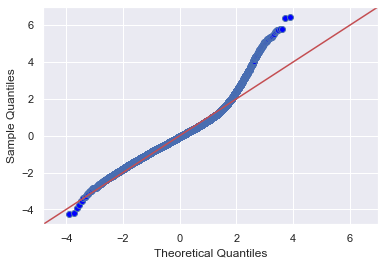

In [113]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

As we can see in Jarque-Bera score, confirmed by the QQ Plot of residuals, this model fails the normality assumption for linear regression, meaning that the results of this model must be evaluated in this light.

#### Model 1

For this model I will remove **'sqft_lot'** and use the encoded version of **'zipcode'**.

In [114]:
categorical_df = pd.concat([
#     bedrooms_processed, 
#     bathrooms_processed,
#     floors_processed,
#     waterfront_processed,
#     view_processed, 
#     condition_processed,
#     grade_processed, 
#     renovated_processed,
    zipcode_processed], axis=1

)

In [115]:
model_1 = scaled_df.drop(['sqft_lot', 'zipcode'], axis=1).merge(
    categorical_df,left_index=True, right_index=True)

In [116]:
X = model_1

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_int = sm.add_constant(X)
model_one = sm.OLS(y,X_int).fit()
model_one.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.824      
Dependent Variable:    price              AIC:                  518362.8219
Date:                  2021-09-23 16:19   BIC:                  519018.8736
No. Observations:      20015              Log-Likelihood:       -2.5910e+05
Df Model:              82                 F-statistic:          1142.      
Df Residuals:          19932              Prob (F-statistic):   0.00       
R-squared:             0.825              Scale:                1.0313e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         310859.3245  5448.6943 57.0521 0.0000 300179.4314 321539.2176
bedrooms       -7480.0631   956.4645 -7.8205 0.0000  -9354.8130  -5605.3132
bathrooms       9097.4144  1025.1771  8.8740 0.0000   7087.9823  11106.8465
sqft_living    63384.8451  1838.0641 34.4846 0.0000  59782.0868  66987.6034
floors         -7823.9281  1121.9505 -6.9735 0.0000 -10023.0443  -5624.8120
waterfront     14165.5816   760.8975 18.6169 0.0000  12674.1593  15657.0039
view           32003.4640   826.3172 38.7302 0.0000  30383.8137  33623.1143
condition      15281.2351   812.7828 18.8011 0.0000  13688.1134  16874.3568
grade          52913.7964  1269.5724 41.6784 0.0000  50425.3291  55402.2637
sqft_above     33351.6755  1766.6074 18.8789 0.0000  29888.9785  36814.3726
sqft_living15  15463.9349  1255.8935 12.3131 0.0000  13002.2795  17925.5903
sqft_lot15      3592.8275   905.1302  3.9694 0.0001   1818.6973   5366.9578
is_renovated    3660.2722   726.8521  5.0358 0.0000   2235.5818   5084.9627
age            18821.4982  1183.7736 15.8996 0.0000  16501.2037  21141.7926
zips_98002     16153.5406  9081.7310  1.7787 0.0753  -1647.4060  33954.4872
zips_98003     -6948.7625  8195.2551 -0.8479 0.3965 -23012.1428   9114.6177
zips_98004    605503.5164  8876.7527 68.2123 0.0000 588104.3442 622902.6886
zips_98005    323925.2962 10014.1865 32.3466 0.0000 304296.6593 343553.9331
zips_98006    267175.3114  7503.3158 35.6076 0.0000 252468.1896 281882.4331
zips_98007    254051.7496 10191.4760 24.9279 0.0000 234075.6108 274027.8885
zips_98008    239489.5145  8252.8605 29.0190 0.0000 223313.2229 255665.8062
zips_98010     90914.3778 12816.4282  7.0936 0.0000  65793.1147 116035.6409
zips_98011    136642.4338  9180.6107 14.8838 0.0000 118647.6748 154637.1929
zips_98014    124154.1699 12687.5627  9.7855 0.0000  99285.4937 149022.8460
zips_98019     93311.5104  9701.4355  9.6183 0.0000  74295.8915 112327.1293
zips_98022     -5960.2832  9331.4262 -0.6387 0.5230 -24250.6533  12330.0868
zips_98023    -23579.9512  7107.5830 -3.3176 0.0009 -37511.4039  -9648.4984
zips_98024    145791.7482 17006.8602  8.5725 0.0000 112456.8904 179126.6060
zips_98027    195153.5069  7893.9372 24.7219 0.0000 179680.7347 210626.2791
zips_98028    129805.3377  8143.4573 15.9398 0.0000 113843.4853 145767.1900
zips_98029    221659.9256  8015.9979 27.6522 0.0000 205947.9042 237371.9469
zips_98030      5148.5320  8399.4311  0.6130 0.5399 -11315.0503  21612.1142
zips_98031     15051.8879  8226.6597  1.8296 0.0673  -1073.0481  31176.8238
zips_98032     -1854.0472 10621.0381 -0.1746 0.8614 -22672.1635  18964.0690
zips_98033    342412.2723  7479.5423 45.7798 0.0000 327751.7484 357072.7961
zips_98034    189263.4032  7008.3128 27.0056 0.0000 175526.5284 203000.2781
zips_98038     35313.3391  7019.9901  5.0304 0.0000  21553.5759  49073.1024
zips_98039    813129.0291 25271.2744 32.1760 0.0000 763595.2335 862662.8247
zips_98040    471815.9149  8866.8943 53.2110 0.0000 454436.0660 489195.7638
zips_98042      7343.5243  7010.5533  1.0475 0.2949  -6397.7422  21084.7908
zips_98045    105394.

Some conclusions we can draw from our first model iteration:

**R^2** is vastly improved at .825.

All of the p-values for our variables are below our alpha of .05.

Most of the encoded data for **'zipcode'** has a low enough p-value that we can reject H0, and assert that **'zipcode'** has a statistically significant impact on **'price'**.

However, our JB score undermines our assumption of normality of residuals.

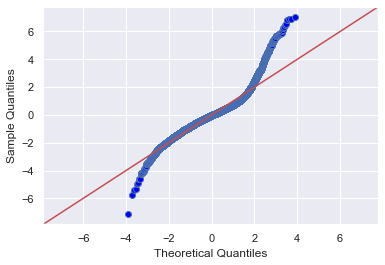

In [117]:
residuals = model_one.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

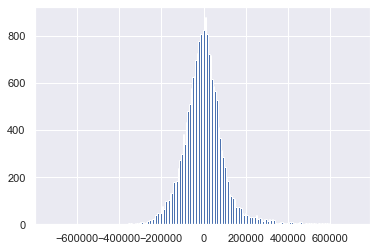

In [118]:
residuals = model_one.resid
fig = residuals.hist(bins='auto')

In [104]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [106]:
result = stepwise_selection(scaled_df, y, verbose=True)
print('resulting features:')
print(result)

Add  sqft_above                     with p-value 0.0
Add  age                            with p-value 0.0
Add  view                           with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 2.70345e-228
Add  floors                         with p-value 3.13141e-124
Add  sqft_lot15                     with p-value 2.0127e-33
Add  condition                      with p-value 1.85646e-31
Add  bedrooms                       with p-value 2.31404e-27
Add  bathrooms                      with p-value 1.979e-34
Add  waterfront                     with p-value 2.98405e-20
Add  is_renovated                   with p-value 0.0025494
Add  zipcode                        with p-value 0.00295184
resulting features:
['sqft_above', 'age', 'view', 'sqft_living15', 'grade', 'sqft_living', 'floors', 'sqft_lot15', 'condition', 'bedrooms', 'bathrooms', 'waterfront', 'is_renovated', 'zipcod

In [ ]:
for col in X_int.drop('const', axis=1).columns:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.tight_layout()
    plt.show();

In [119]:
X = scaled_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_int_train = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_int_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.599      
Dependent Variable:    price              AIC:                  374440.3038
Date:                  2021-09-23 16:20   BIC:                  374561.0642
No. Observations:      14010              Log-Likelihood:       -1.8720e+05
Df Model:              15                 F-statistic:          1397.      
Df Residuals:          13994              Prob (F-statistic):   0.00       
R-squared:             0.600              Scale:                2.3674e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         490272.9839 1300.1193 377.0984 0.0000 487724.5764 492821.3914
bedrooms      -19707.5569 1703.9823 -11.5656 0.0000 -23047.5898 -16367.5240
bathrooms      18963.6134 1843.2554  10.2881 0.0000  15350.5868  22576.6400
sqft_living    82109.5836 3288.9063  24.9656 0.0000  75662.8882  88556.2791
sqft_lot        -156.0859 2204.6305  -0.0708 0.9436  -4477.4560   4165.2842
floors         26079.8690 1845.1451  14.1343 0.0000  22463.1383  29696.5998
waterfront     11928.5229 1427.7661   8.3547 0.0000   9129.9108  14727.1350
view           21652.7820 1451.9432  14.9130 0.0000  18806.7795  24498.7844
condition      14115.6538 1436.8136   9.8243 0.0000  11299.3072  16932.0003
grade         114379.3444 2115.1927  54.0751 0.0000 110233.2842 118525.4045
sqft_above    -21957.3655 3012.7836  -7.2881 0.0000 -27862.8236 -16051.9074
zipcode         3940.0903 1488.1370   2.6477 0.0081   1023.1432   6857.0374
sqft_living15  34885.9165 2152.5192  16.2070 0.0000  30666.6915  39105.1416
sqft_lot15    -14945.5160 2267.3169  -6.5917 0.0000 -19389.7600 -10501.2721
is_renovated    3550.4488 1313.8578   2.7023 0.0069    975.1121   6125.7855
age            85948.0183 1803.7520  47.6496 0.0000  82412.4236  89483.6130
---------------------------------------------------------------------------
Omnibus:                2399.118         Durbin-Watson:            1.986   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         7355.891
Skew:                   0.889            Prob(JB):                 0.000   
Kurtosis:               6.073            Condition No.:            7       
===========================================================================

"""

In [122]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)



Train Mean Squarred Error: 23646581029.20645
Test Mean Squarred Error: 23644978942.557575
